In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from glob import glob

In [3]:
import cv2

In [4]:
import pandas as pd

In [5]:
from skimage import io

In [6]:
from skimage.io import imread

In [7]:
import random

In [8]:
from PIL import Image, ImageOps

In [9]:
import matplotlib as mplot

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
import matplotlib.image as mpimg

In [13]:
from os.path import join

In [14]:
import numpy as np

In [15]:
import seaborn as sns
plt.style.use('fivethirtyeight')

In [16]:
import tensorflow as tf

In [17]:
from tensorflow import convert_to_tensor as ctt, clip_by_value as cbv

In [18]:
from tensorflow.random import normal as random_normal_distribution

In [19]:
from tensorflow.keras.layers import Conv2D, concatenate, Input, GaussianNoise

In [20]:
from tensorflow.keras.models import Sequential, Model, load_model

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
import tensorflow.keras.backend as bk

In [23]:
import scipy.misc

In [24]:
from tqdm import tqdm

In [25]:
import plotly.express as px

In [26]:
import os

In [27]:
cover_images_ds_path = "./Datasets/TRAIN/NEUTRAL/"

In [28]:
cover_images_list = glob(cover_images_ds_path+"*.png")

In [29]:
files_list = cover_images_list

In [30]:
trainable=False

In [31]:
epoach_count = 100

In [32]:
batch_size = 16

In [33]:
logs_file_path = "./my_logs/"
endpoints_path = './my_endpoints/'

In [34]:
result_value=0.8

In [35]:
result_format = f"result_{result_value}"

In [36]:
def display_images(images_list, title):
    display_idx=0
    fig, ax = plt.subplots(2, 5,  tight_layout=True,  sharex=True, sharey=True)
    for i, row in enumerate(ax):
        for j, image_col in enumerate(row):
            dpi = mplot.rcParams['figure.dpi']
            img = Image.open(images_list[display_idx])
            #height, width, depth = img.shape
            img = img.resize((32,32))
            
            #figsize = width / float(dpi), height / float(dpi)
            #fig.tight_layout()
            
            plt.figure(figsize=(30,30) )
            plt.subplots_adjust(hspace=0.6)
            image_col.imshow(img)
            img_path_part_list = images_list[display_idx].split("\\")
            img_file_name = img_path_part_list[len(img_path_part_list) -1]
            image_col.set_title(img_file_name, fontsize=9)
            display_idx=display_idx+1
    plt.suptitle(title, fontsize=12)
    plt.show()

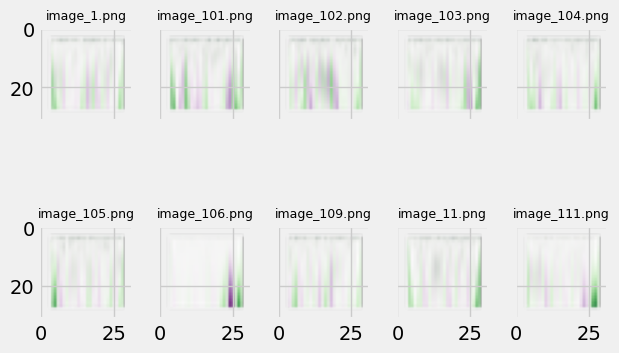

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

In [37]:
display_images(cover_images_list, 'Cover Images Observations')

In [38]:
secret_images_ds_path = "./Datasets/TEST/NEUTRAL"

In [39]:
secret_images_list = glob(secret_images_ds_path+"/*.png")

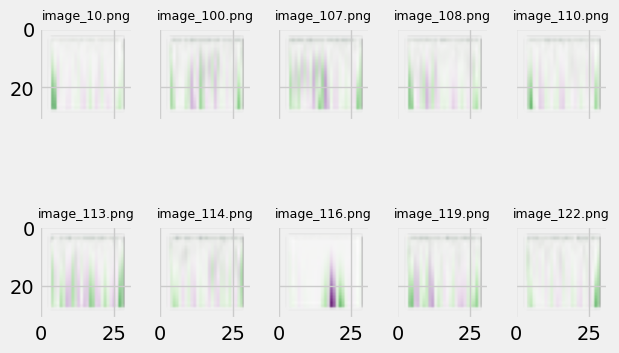

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

In [40]:
display_images(secret_images_list, 'Secret Images Observations')

In [41]:
medical_image_size = (32,32)

In [42]:
secret_images_list

['./Datasets/TEST/NEUTRAL\\image_10.png',
 './Datasets/TEST/NEUTRAL\\image_100.png',
 './Datasets/TEST/NEUTRAL\\image_107.png',
 './Datasets/TEST/NEUTRAL\\image_108.png',
 './Datasets/TEST/NEUTRAL\\image_110.png',
 './Datasets/TEST/NEUTRAL\\image_113.png',
 './Datasets/TEST/NEUTRAL\\image_114.png',
 './Datasets/TEST/NEUTRAL\\image_116.png',
 './Datasets/TEST/NEUTRAL\\image_119.png',
 './Datasets/TEST/NEUTRAL\\image_122.png',
 './Datasets/TEST/NEUTRAL\\image_128.png',
 './Datasets/TEST/NEUTRAL\\image_129.png',
 './Datasets/TEST/NEUTRAL\\image_131.png',
 './Datasets/TEST/NEUTRAL\\image_140.png',
 './Datasets/TEST/NEUTRAL\\image_143.png',
 './Datasets/TEST/NEUTRAL\\image_145.png',
 './Datasets/TEST/NEUTRAL\\image_147.png',
 './Datasets/TEST/NEUTRAL\\image_150.png',
 './Datasets/TEST/NEUTRAL\\image_154.png',
 './Datasets/TEST/NEUTRAL\\image_160.png',
 './Datasets/TEST/NEUTRAL\\image_161.png',
 './Datasets/TEST/NEUTRAL\\image_164.png',
 './Datasets/TEST/NEUTRAL\\image_167.png',
 './Datasets

In [43]:
len(cover_images_list), len(secret_images_list)

(537, 179)

In [44]:
cover_images_list = cover_images_list[0:10]

In [45]:
len(cover_images_list), len(secret_images_list)

(10, 179)

In [46]:
mean_list = [0.485, 0.456, 0.406]

In [47]:
trs = [0.299, 0.587, 0.114]

In [48]:
mean = np.array(mean_list)

In [49]:
variance_list = [0.229, 0.224, 0.225]

In [50]:
variance = np.array(variance_list)

In [51]:
def images_normalization(imgs):
    print(type(imgs))
    return (imgs -  mean) / variance

In [52]:
def get_cover_secret_images_list():
    cover_list = []
    secret_list = []

    for i in range(len(cover_images_list)):
        img_i = image.load_img(os.path.join(cover_images_list[i]))
        x = image.img_to_array(img_i)
        cover_list.append(x)
        
        img_i = image.load_img(os.path.join(secret_images_list[i]))
        x = image.img_to_array(img_i)
        secret_list.append(x)
            
    random.shuffle(cover_list)
    random.shuffle(secret_list)
    cover_list = np.array(cover_list)/255.
    secret_list = np.array(secret_list)/255.

    #cover_list,secret_list = images_normalization(np.array(cover_list)) , images_normalization(np.array(secret_list))

    return cover_list,secret_list

In [53]:
cover_list,secret_list = get_cover_secret_images_list()

In [54]:
len(cover_list), len(secret_list)

(10, 10)

In [55]:
cover_list

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

In [56]:
np.random.shuffle(secret_list)
np.random.shuffle(cover_list)

In [57]:
learning_rate = .0001

In [58]:
beta_value = 1.0

In [59]:
def reveal_losses(secret_truth, secret_predicted):
    square_result = bk.square(secret_truth - secret_predicted)
    return beta_value * bk.sum(square_result)

In [60]:
i, j, k = 0,3,6

In [61]:
def get_final_secret_cover_losses(ground_truth, predicted):
    secret_truth = ground_truth[...,i:j]
    cover_truth = ground_truth[...,j:k]

    secret_predicted = predicted[...,i:j] 
    cover_predicted = predicted[...,j:k]
    secret_mse_losses = reveal_losses(secret_truth, secret_predicted)
    square_result = bk.square(cover_truth - cover_predicted)
    cover_mse_losses = bk.sum(square_result)
    
    return secret_mse_losses + cover_mse_losses

In [62]:
max_ix = secret_list.shape[0]

In [63]:
image_size = cover_list.shape[1:]

In [64]:
image_size

(400, 600, 3)

In [65]:
activation_function = tf.nn.relu

In [66]:
filters = [50, 10, 5, 3]

In [67]:
kernel_sizes = [(3,3), (4,4), (5,5)]

In [68]:
def create_convolution_layer(ly, layer_name):
    c1 = Conv2D(filters=filters[0],kernel_size=kernel_sizes[0],dilation_rate=(1, 1),padding='same',name=layer_name+"-01",activation=activation_function)
    c1 = c1(ly)
    c2 = Conv2D(filters=filters[1],kernel_size=kernel_sizes[1],dilation_rate=(1, 1),padding='same',name=layer_name+"02",activation=activation_function)
    c2 = c2(ly)
    c3 = Conv2D(filters=filters[2],kernel_size=kernel_sizes[2],dilation_rate=(1, 1),padding='same',name=layer_name+"03",activation=activation_function)
    c3 = c3(ly)
    conv_layers = concatenate([c1, c2, c3])
    return conv_layers

In [69]:
def define_preparation_architecture(secret_input_layer, cover_input_layer, operation_type="train_"):
    
    first_conv_layers = create_convolution_layer(secret_input_layer,"Prep-01")
    final_conv_layers = create_convolution_layer(first_conv_layers,"Prep-02")
    
    preparation_network_final_layer = concatenate([cover_input_layer, final_conv_layers])
    return preparation_network_final_layer

In [70]:
def define_hiding_architecture(input_size, operation_type="train_"):
    secret_input_layer = Input(shape=(input_size))
    cover_input_layer= Input(shape=(input_size))
    
    preparation_network_final_layer = define_preparation_architecture(secret_input_layer, cover_input_layer)
    
    
    first_hide_conv_layers = create_convolution_layer(preparation_network_final_layer,"Hiding-01")
    second_hide_conv_layers = create_convolution_layer(first_hide_conv_layers,"Hiding-02")
    third_hide_conv_layers = create_convolution_layer(second_hide_conv_layers,"Hiding-03")
    fourth_hide_conv_layers = create_convolution_layer(third_hide_conv_layers,"Hiding-04")
    fifth_hide_conv_layers = create_convolution_layer(fourth_hide_conv_layers,"Hiding-05")
    
    cover_out = Conv2D(filters[3], kernel_size=kernel_sizes[0], padding='same', activation='relu', name='output_C')(fifth_hide_conv_layers)
    
    return Model(inputs=[secret_input_layer, cover_input_layer], outputs=cover_out, name = 'hiding_architecture')

In [71]:
def define_reveal_architecture(input_size, operation_type="train_"):
    reveal_input = Input(shape=(input_size))
    reveal_gaussian = GaussianNoise(0.01, name='output_gaussian')(reveal_input)
    
    first_conv2d_layer = create_convolution_layer(reveal_input, operation_type+"reveal_conv2d_1")
    second_conv2d_layer = create_convolution_layer(first_conv2d_layer, operation_type+"reveal_conv2d_2")
    third_conv2d_layer = create_convolution_layer(second_conv2d_layer, operation_type+"reveal_conv2d_3")
    fourth_conv2d_layer = create_convolution_layer(third_conv2d_layer, operation_type+"reveal_conv2d_4")
    fifth_conv2d_layer = create_convolution_layer(third_conv2d_layer, operation_type+"reveal_conv2d_5")
    
    secret_output = Conv2D(filters[3], kernel_size=kernel_sizes[0], dilation_rate=(1, 1), padding='same', activation=activation_function, name='secret_output')
    secret_output = secret_output(fifth_conv2d_layer)
    
    return Model(inputs=reveal_input, outputs=secret_output, name = 'reveal_architecture')

In [72]:
def create_model():
    input_size = secret_list.shape[1:]
    secret_input_layer = Input(shape=(input_size))
    cover_input_layer= Input(shape=(input_size))
    
    hiding_model = define_hiding_architecture(input_size)
    
    reveal_model = define_reveal_architecture(input_size)
    reveal_model.compile(optimizer='adam', loss=reveal_losses)
    reveal_model.trainable = False
    
    cover_output = hiding_model([secret_input_layer, cover_input_layer])
    
    secret_output = reveal_model(cover_output)
    
    model = Model(inputs=[secret_input_layer, cover_input_layer], outputs=concatenate([secret_output, cover_output]))
    model.compile(optimizer='adam', loss=get_final_secret_cover_losses)
    
    return hiding_model, reveal_model, model

In [73]:
hiding_model, reveal_model, model = create_model()

In [74]:
hiding_model.summary()

Model: "hiding_architecture"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 400, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 Prep-01-01 (Conv2D)            (None, 400, 600, 50  1400        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 Prep-0102 (Conv2D)             (None, 400, 600, 10  490         ['input_3[0][0]']                
                                )                                               

                                                                                                  
 Hiding-05-01 (Conv2D)          (None, 400, 600, 50  29300       ['concatenate_6[0][0]']          
                                )                                                                 
                                                                                                  
 Hiding-0502 (Conv2D)           (None, 400, 600, 10  10410       ['concatenate_6[0][0]']          
                                )                                                                 
                                                                                                  
 Hiding-0503 (Conv2D)           (None, 400, 600, 5)  8130        ['concatenate_6[0][0]']          
                                                                                                  
 concatenate_7 (Concatenate)    (None, 400, 600, 65  0           ['Hiding-05-01[0][0]',           
          

In [75]:
reveal_model.summary()

Model: "reveal_architecture"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 400, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 train_reveal_conv2d_1-01 (Conv  (None, 400, 600, 50  1400       ['input_5[0][0]']                
 2D)                            )                                                                 
                                                                                                  
 train_reveal_conv2d_102 (Conv2  (None, 400, 600, 10  490        ['input_5[0][0]']                
 D)                             )                                               

In [76]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 400, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 hiding_architecture (Functiona  (None, 400, 600, 3)  293273     ['input_1[0][0]',                
 l)                                                               'input_2[0][0]']            

In [77]:
learning_rates = [0.001, 0.0003, 0.0001, 0.00003]

In [78]:
eh_counts = [200,400,600]

In [79]:
def get_learning_rate(eh_index):
    if eh_index < eh_counts[0]:
        return learning_rates[0]
    elif eh_index < eh_counts[1]:
        return learning_rates[1]
    elif eh_index < eh_counts[2]:
        return learning_rates[2]
    else:
        return learning_rates[3]

In [80]:
loss_history = []

In [81]:
can_train = False

In [82]:
if can_train:
    for epoch in range(epoach_count): 
        secret_images_list = tqdm(range(0, secret_list.shape[0], batch_size),mininterval=0)
        associative_embedding_loss_list = []
        reveal_loss_list = []
        for image_index in secret_images_list:

            secret_batch_images = secret_list[image_index:min(image_index + batch_size, max_ix)]
            cover_batch_images = cover_list[image_index:min(image_index + batch_size, max_ix)]

            primary_input = hiding_model.predict([secret_batch_images, cover_batch_images])

            associative_embedding_loss_list.append(model.train_on_batch(x=[secret_batch_images, cover_batch_images],
                                                       y=np.concatenate((secret_batch_images, cover_batch_images),axis=3)))
            reveal_loss_list.append(reveal_model.train_on_batch(x=primary_input,
                                                  y=secret_batch_images))

            bk.set_value(model.optimizer.lr, get_learning_rate(epoch))
            bk.set_value(reveal_model.optimizer.lr, get_learning_rate(epoch))
            associative_embedding_loss_mean = np.mean(associative_embedding_loss_list)
            reveal_loss_mean = np.mean(reveal_loss_list)
            secret_images_list.set_description('Epoch Number {} | Batch: {:3} of {}. Associative Embedding Loss {:10.2f} | Loss Reveal {:10.2f}'.format(epoch + 1, image_index, max_ix, associative_embedding_loss_mean, reveal_loss_mean))
        loss_history.append(np.mean(associative_embedding_loss_mean))
    loss_df = pd.DataFrame({"Loss-History":loss_history})
    loss_df.to_csv("Loss-History.csv", index=False)
    model.save("Medical-Steganography-01.keras")
else:
    model = load_model("Medical-Steganography-01.keras", compile=False)
    loss_df = pd.read_csv("Loss-History.csv")
    loss_history = loss_df["Loss-History"].to_numpy()

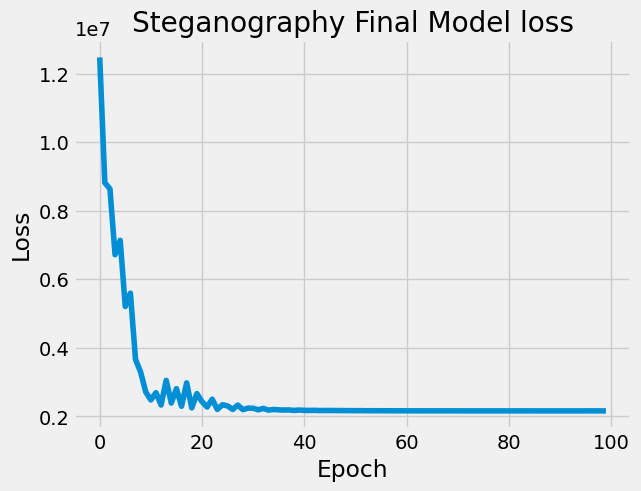

In [83]:
plt.plot(loss_history)
plt.title('Steganography Final Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [84]:
revealed_images = model.predict([secret_list, cover_list])

1/1 [==============================] - 11s 11s/step


In [85]:
revealed_secret_image, revealed_cover_image = revealed_images[...,i:j], revealed_images[...,j:k]

In [86]:
secret_data_difference = np.abs(revealed_secret_image - secret_list)
cover_data_difference = np.abs(revealed_cover_image - cover_list)

In [87]:
def cover_secret_loss(sec_list, cov_list, revealed_sec_image, revealed_cov_image):
    sec_data = np.sqrt(np.mean(np.square(255*(sec_list - revealed_sec_image))))
    cov_data = np.sqrt(np.mean(np.square(255*(cov_list - revealed_cov_image))))
    
    return sec_data, cov_data

In [88]:
S_error, C_error = cover_secret_loss(secret_list, cover_list, revealed_secret_image, revealed_cover_image)

In [89]:
secret_data_hist_data = secret_data_difference.flatten() * 255
cover_data_hist_data = cover_data_difference.flatten() * 255

In [90]:
cover_data_hist_data

array([ 39.798683,  65.976814, 255.      , ..., 105.36149 ,  59.776646,
       255.      ], dtype=float32)

In [91]:
secret_data_hist_data

array([111.72551 ,  83.82292 ,  62.40478 , ...,  97.89591 ,  50.319073,
        47.546288], dtype=float32)

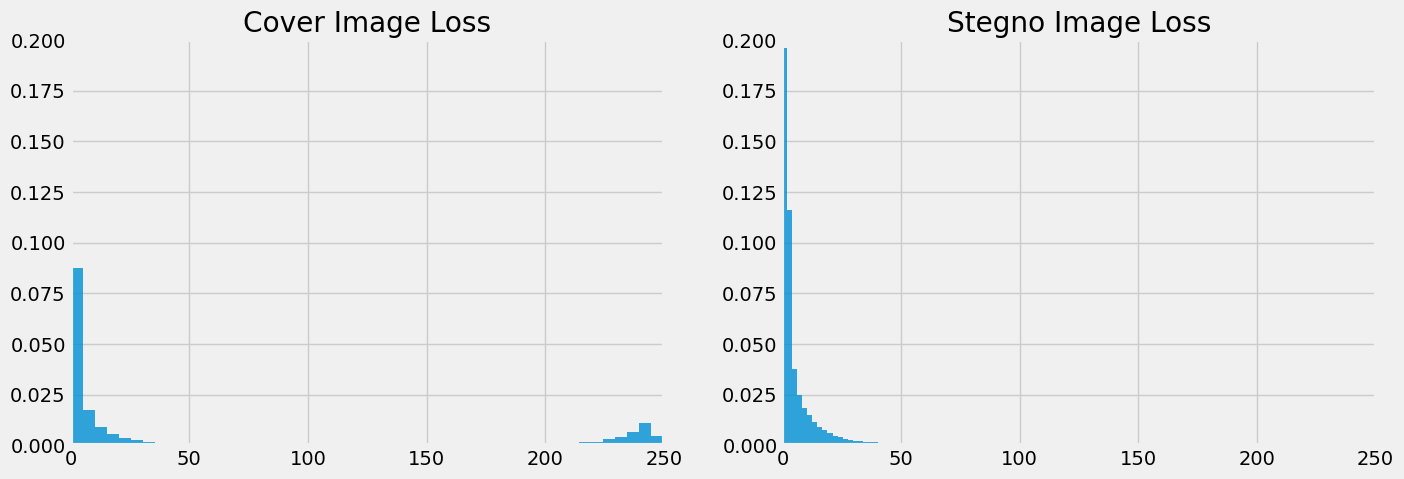

In [92]:
fig = plt.figure(figsize=(15, 5))
a=fig.add_subplot(1,2,1)
        
imgplot = plt.hist(cover_data_hist_data, 50, density=True, alpha=0.8)
a.set_title('Cover Image Loss')
plt.axis([0, 250, 0, 0.2])
    
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(secret_data_hist_data, 100, density=True, alpha=0.8)
a.set_title('Stegno Image Loss')
plt.axis([0, 250, 0, 0.2])
    
plt.show()

In [93]:
def rgb_to_gray_image(img):
    return np.dot(img[...,:i], trs)

In [94]:
def show_all_types_of_images(img, row_count, col_count, idx, display_title, title=None):
    ax = plt.subplot(row_count, col_count, idx)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if display_title is not None:
        plt.title(title, fontsize=12)

In [95]:
col_count = 6

In [96]:
len(cover_list)

10

In [97]:
rand_indx = [random.randint(0, len(cover_list)-1) for x in range(col_count)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

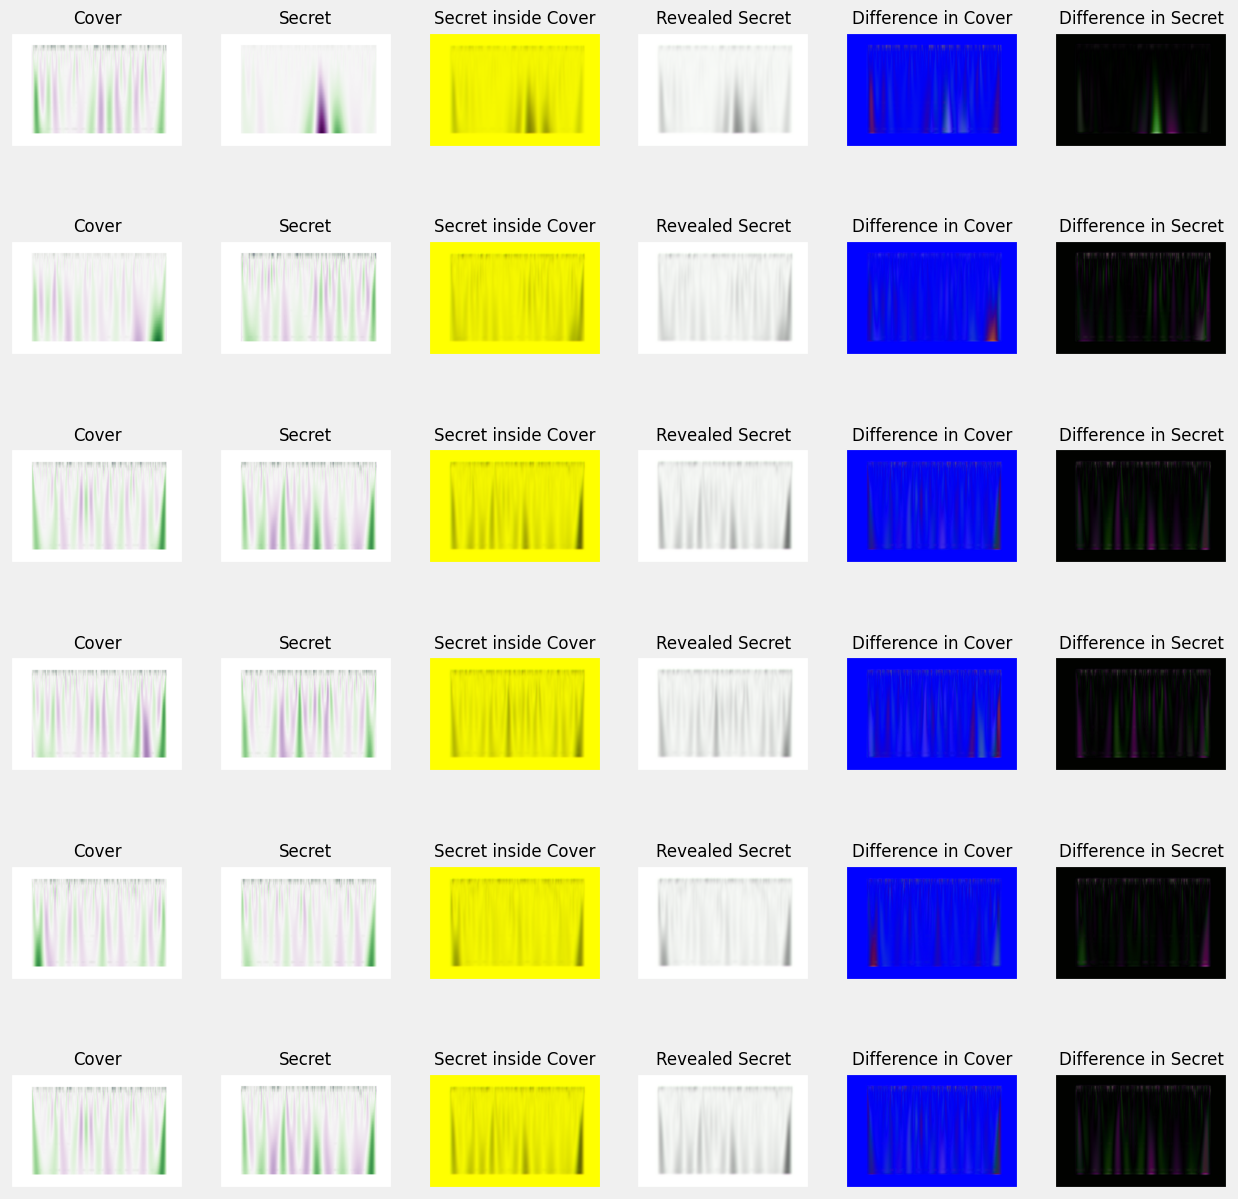

In [98]:
plt.figure(figsize=(14, 15))
for i, idx in enumerate(rand_indx):
    display_title = i==0
     
    
    show_all_types_of_images(cover_list[idx], 6, col_count, i * col_count + 1,  display_title, title='Cover')

    show_all_types_of_images(secret_list[idx], 6, col_count, i * col_count + 2,  display_title, title='Secret')
    
    show_all_types_of_images(revealed_cover_image[idx], 6, col_count, i * col_count + 3,  display_title, title='Secret inside Cover')
    
    show_all_types_of_images(revealed_secret_image[idx], 6, col_count, i * col_count + 4,  display_title, title='Revealed Secret')

    show_all_types_of_images(np.multiply(cover_data_difference[idx], 1), 6, col_count, i * col_count + 5,  display_title, title='Difference in Cover')
    
    show_all_types_of_images(np.multiply(secret_data_difference[idx], 1), 6, col_count, i * col_count + 6,  display_title, title='Difference in Secret')